In [25]:
cd /Users/anthonydepalatis/Documents/School/EE379K/Lab7/nn_compsensing/tfupgraded_src

/Users/anthonydepalatis/Documents/School/EE379K/Lab7/nn_compsensing/tfupgraded_src


In [238]:
import tensorflow as tf
import numpy as np
import glob
import os
import sys
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize 
%matplotlib inline

import dcgan_model
import dcgan_utils
import dcgan_ops
import celebA_estimators


In [244]:
# define the graph
sess = tf.Session()
z = tf.Variable(tf.placeholder(tf.float32, shape=[64, 100], name = 'z'))
#a = np.zeros((64, 100))
#a[0] = 1
#z = tf.Variable(a, tf.float32, name = 'z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

In [245]:
# load variables
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

In [246]:
# generate images
#feed_dict = {z : np.random.randn(64, 100)}
feed_dict = {z : np.zeros((64, 100))}
feed_dict[z][0] = 1

x_hat_val = sess.run(x_hat, feed_dict=feed_dict)

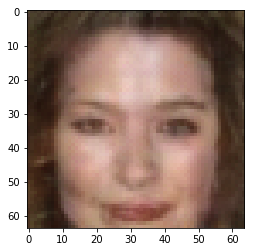

In [247]:
# inspect
im_idx = 3
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[im_idx, :]))

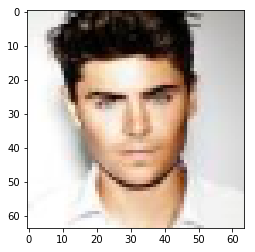

In [248]:
# Get Zac Efron's picture and resize to 64x64x3
zefron = io.imread('/Users/anthonydepalatis/Downloads/images.jpeg')
zefron = resize(zefron, (64, 64, 3))
plt.imshow(zefron)

In [249]:
64 * 64 * 3

12288

In [250]:
''' Reshape the images into vectors and define loss function. '''
zefron_vec = zefron.reshape(12288,1)
test_vec = dcgan_utils.inverse_transform(x_hat_val[im_idx, :]).reshape(12288, 1)
zefron_vec = tf.Variable(zefron_vec, dtype=tf.float32)
test_vec = tf.Variable(test_vec)

squared_diff = tf.square(zefron_vec - test_vec)
squared_loss = tf.reduce_sum(squared_diff)

In [252]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(squared_loss)

init = tf.global_variables_initializer()

def optimize():
    with tf.Session() as sess:tg
        sess.run(init)
    #    print("starting at", "x:", sess.run(test_vec), "log(x)^2:", sess.run(squared_loss))
        for step in range(10):  
            sess.run(train)
    #        print("step", step, "x:", sess.run(test_vec), "log(x)^2:", sess.run(squared_loss))
optimize()

FailedPreconditionError: Attempting to use uninitialized value Variable_12
	 [[Node: Variable_12/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_12"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_12)]]

Caused by op u'Variable_12/read', defined at:
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-182-5a7271bab60d>", line 4, in <module>
    test_vec = tf.Variable(test_vec)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 226, in __init__
    expected_shape=expected_shape)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 344, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1490, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/anthonydepalatis/anaconda/envs/tf_env/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_12
	 [[Node: Variable_12/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_12"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_12)]]


In [214]:
print sess.run(test_vec)

FailedPreconditionError: Attempting to use uninitialized value Variable_36
	 [[Node: _send_Variable_36_0 = _Send[T=DT_FLOAT, client_terminated=true, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=4846017953020920749, tensor_name="Variable_36:0", _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_36)]]

In [8]:
# clean up
sess.close()

# Apply discriminator

In [9]:
# define the graph
sess = tf.Session()
x_hat = tf.placeholder(tf.float32, shape = [1, 64*64*3], name='x_hat')
d_loss, restore_dict, restore_path = celebA_estimators.dcgan_discrim(x_hat, sess)

In [10]:
# load variables
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

In [11]:
# apply on random images
for _ in range(10):
    x_hat_val = np.reshape(2*np.random.random((1, 64, 64, 3)) - 1, [1, -1])
    feed_dict = {x_hat: x_hat_val}
    d_loss_val = sess.run(d_loss, feed_dict=feed_dict)
    print np.exp(-d_loss_val)

[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 0.99999392]
[ 1.]
[ 1.]


In [12]:
image_paths = glob.glob(os.path.join("../data", 'celebA', "*.jpg"))
image_paths.sort()
image_paths = image_paths[:64]
images = [dcgan_utils.get_image(image_path, 108) for image_path in image_paths]

In [13]:
len(images)

64

In [14]:
# Apply on one image
im_idx = 12
x_hat_val = images[im_idx].reshape([1, -1])
feed_dict = {x_hat: x_hat_val}
d_loss_val = sess.run(d_loss, feed_dict=feed_dict)

[ 0.9087922]


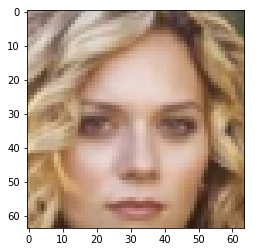

In [15]:
# inspect
plt.imshow(dcgan_utils.inverse_transform(images[im_idx]))
print np.exp(-d_loss_val)


In [16]:
# clean up
sess.close()